# Search analytics of interest for Airbnb in Taiwan

<font face="Terminal"> Author: Yurou Wang  <br>
        Last updated: 6th August 2018 </font>

## Introduction

How much are people intersted in Airbnb? 

The “sharing economy” concept has been embraced by governments, entrepreneurs and commentators as delivering new forms of opportunity for local and national economies.Accommodation-sharing platform Airbnb is often considered a sharing economy exemplar, and has promoted itself as helping middle-class residents to gain and retain a foothold in expensive housing markets.Besides,Airbnb is one of the largest hospitality brands in the world hosting thousands of travelers every day. But at June 13th, Taiwan News published a article : Taiwan is gunning for 'unlicensed rentals' with AirBnB in its crosshairs.It showed that the Taiwan government are poised to start cracking down on businesses that provide “unlicensed” accommodation across the country. It must contributes to the thriving growing economy of economy of small-scale accommodation providers and Taiwan’s tourism industry. Based on this situation, I wonder the interest trend of Airbnb in Taiwan in the past and future, and do this sort of analysis using Python and API of Google Trend.

This article will both show the analysis, the graphs of data and my perspective on it.  <br>
We will:  <br> <br>
    ・ explore the interest trend of Airbnb in Taiwan in these years via the keyword searched most as shown on interest section.   <br>
    ・ explore the interest level of different region in Taiwan via the keyword searched most as shown on region section.   <br>
    ・ observe what time people search the keyword most in a day.   <br>

## 0. Imports that allow the Python code to work

We begin by loading a few modules. The special modules might be installed is pytrend, which is a api of Google Tread for automating downloading of reports from Google Trend. Also, for this analysis, I using the matplotlib to visualizes data.

In [8]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import json
import pandas
import seaborn as sns
import numpy

## 1. Explore the Interest Trend of Airbnb in these years

The heart of the analysis will be figuring out how much people are interest in Airbnb. As a first pass, I use the interest_over_time function and have the words “Airbnb” compared with “Booking.com” which is the traditional hostel accommodation platform to obtain the data about degree of different types of travel accommodation and how much people are interested in it from 2012.


In [29]:
kw_list = ['Airbnb','Booking.com']
pytrend = TrendReq(hl='en-US', tz=360)
pytrend.build_payload(kw_list , cat=0, timeframe='2012-01-01 2018-08-01', geo='TW', gprop='')
pytrend.interest_over_time().get('Airbnb','Booking.com')
preload = json.loads(pytrend.interest_over_time().to_json(orient='table'))['data']
df = pandas.DataFrame(preload)
df.head()

x = len(df)
c = []
for i in range(x):
    c.append(((df['date'][i])[2:7]))
p = pandas.DataFrame(c,columns=['YY-MM'])

dd = pandas.concat([p,df['Airbnb'],df['Booking.com']],axis=1)
dd.head()

,YY-MM,Airbnb,Booking.com
0,12-01,1,4
1,12-02,1,6
2,12-03,2,6
3,12-04,2,6
4,12-05,2,7


Use the Matplotlib to transfer the data to graphs. And have control of graph styles via the pyplot module.

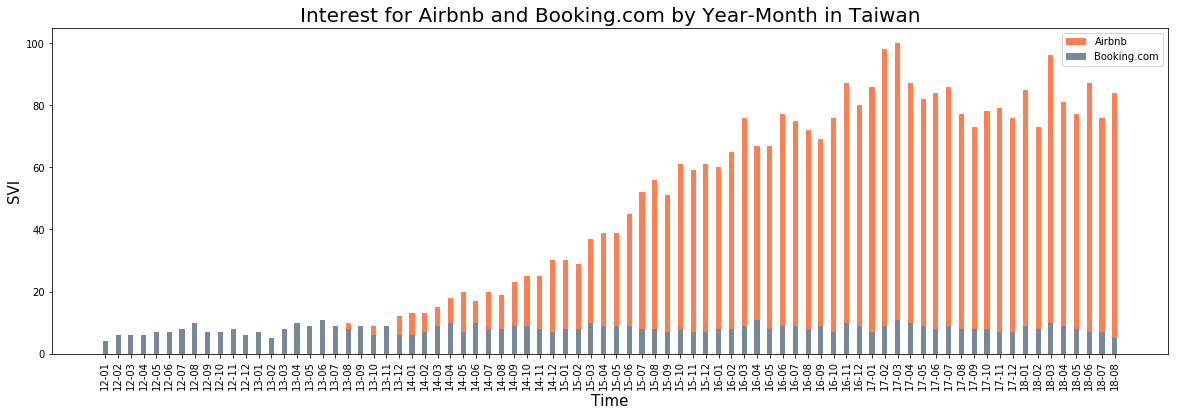

In [34]:
plt.figure(figsize=(20,6))

plt.bar(dd['YY-MM'],dd['Airbnb'], width = 0.4,color='coral',label='Airbnb')
plt.bar(dd['YY-MM'],dd['Booking.com'], width = 0.4,color='lightslategray',label='Booking.com')
plt.xticks(rotation=90)

plt.xlabel("Time",fontsize = 15)
plt.ylabel("SVI",fontsize = 15)
plt.title("Interest for Airbnb and Booking.com by Year-Month in Taiwan",fontsize = 20)

plt.legend()

According to this chart , from 2012 , we can see the obvious rise of interest of people for Airbnb which platform pubished at 2008. Compared to the booking.com, Airbnb get more attractoin and interest from people on the Internet in Taiwan, but after 2017, it declines. It seems to effect by the events which the goverment of global identified Airbnb as illegal product . Based on this situation, maybe Airbnb will comes to a new type of ways to shpae their product , or keep decline and new accommodation company will appears in the future.

## 2. Explore the interest level of different region in Taiwan

And this part will be figuring out the interest level of different region in Taiwan. To observe the difference, I use the interst_by_region function and have the word comes to  “Airbnb” and the geo to be “TW” and use the numpy module to generate the form.


In [31]:
kw_list = ['Airbnb']
pytrend2 = TrendReq(hl='en-US', tz=360)
pytrend2.build_payload(kw_list , cat=0, timeframe='2015-01-01 2018-08-01', geo='TW', gprop='')
pytrend2.interest_over_time().get('Airbnb')


pppreload = pytrend2.interest_by_region(resolution='COUNTRY')
xb = json.loads(pytrend2.interest_by_region().to_json(orient='table'))['data']
xbb = pandas.DataFrame(xb)
xbb.head()

,Airbnb,geoName
0,56,Kaohsiung City
1,76,New Taipei City
2,59,Taichung City
3,57,Tainan City
4,100,Taipei City


Use the Matplotlib to transfer the upper data to graphs. And have control of graph styles via the pyplot module.

Text(0.5,1,'The Interest Level of Different Region in Taiwan')

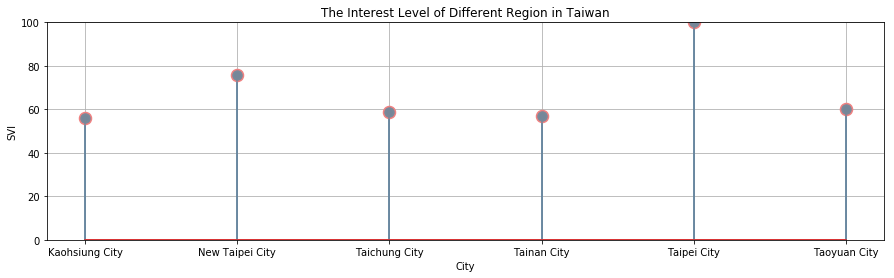

In [35]:
plt.figure(figsize=(15,4))
plt.grid([bool])
plt.stem(xbb['geoName'],xbb['Airbnb'])
plt.ylim(0,100)
(markers, stemlines, baseline) = plt.stem(xbb['Airbnb'])
plt.setp(markers, alpha=4, markersize=12, color="lightslategray",markeredgecolor="lightcoral", markeredgewidth=1.5 )
plt.setp(stemlines, alpha=4,linestyle="-", color="lightslategray", linewidth=1.5 )
plt.xticks()

plt.xlabel("City",fontsize = 10)
plt.ylabel("SVI",fontsize = 10)
plt.title("The Interest Level of Different Region in Taiwan")

According to this chart,  we can see the SVI of Taipei City is higher than other cities in Taiwan. Taipei is knowns as capital of Taiwan. Be a international city, people in Taipei have higher acceptability and uses of new types of accommodaion than other cities. But the less SVI in other cities , it maybe means that the more space and ways "Airbnb" can challenge and try to broaden their market in Taiwan.

## 3.Observe what time people search the keyword most in a day. 

To observe what time people search the “Airbnb” most or least in 24-hrs a day,use the interest_over_time funtion and adjust the time limit to generate the form of SVI of different TC via numpy mudule

In [32]:
pytrend2.build_payload(kw_list , cat=0, timeframe='2018-08-01T00 2018-08-04T00', geo='TW', gprop='')
pytrend2.interest_over_time().get('Airbnb')
preload2 = json.loads(pytrend2.interest_over_time().to_json(orient='table'))['data']
df2 = pandas.DataFrame(preload2)

ccc= df2[:24]

x2 = len(ccc)
c2 = []
for i in range(x2):
    c2.append(((ccc['date'][i])[10:13]))
p2 = pandas.DataFrame(c2,columns=['date'])
dd2 = pandas.concat([p2,ccc['Airbnb']],axis=1)
dd2.head()

,date,Airbnb
0,T00,43
1,T01,51
2,T02,48
3,T03,63
4,T04,68


Use the Matplotlib to transfer the upper data to graphs. And have control of graph styles via the pyplot module.

Text(0.5,1,'What Time People Search Most in A Day')

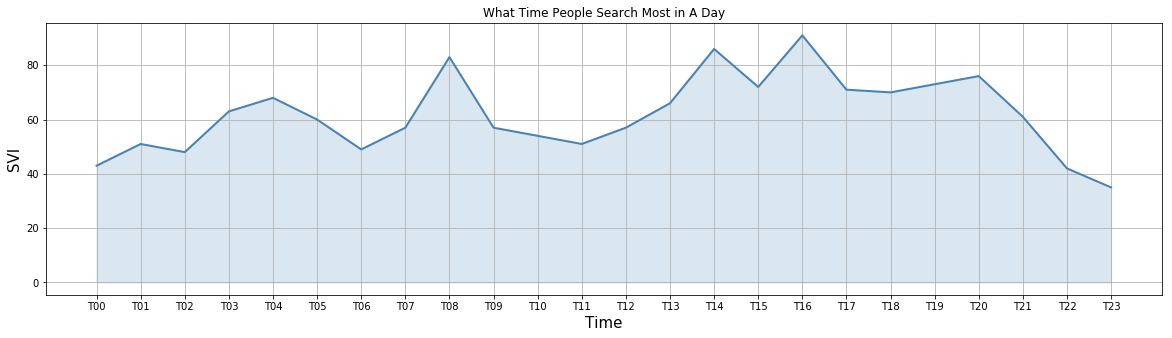

In [36]:
plt.figure(figsize=(20,5))
plt.grid([bool])

x = dd2['date']
y = dd2['Airbnb']

plt.plot(x, y, color='steelblue', lw=2)
plt.fill_between(x, 0, y, color='steelblue',alpha=0.2)

plt.xlabel("Time",fontsize = 15)
plt.ylabel("SVI",fontsize = 15)
plt.title("What Time People Search Most in A Day")

Accordimg to this chart , we can see the number of TC16 higher than others, also TC08 and TC16 to TC20 is over 60 (SVI) , it probably means if you post some article or advertisement on social media or website at these time , maybe it can get more acctraction from people.